# A0314648Y_SUDHANSHU MISHRA_CA1

In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from utils import *
from sklearn.cluster import KMeans


### Some utility functions implemented from scratch

In [2]:
def relu(x):
    return np.maximum(0, x)



def accuracy_score(y_true, y_pred):
    """
    Calculate the accuracy score.
    
    Parameters:
    y_true (numpy.ndarray): True labels.
    y_pred (numpy.ndarray): Predicted labels.
    
    Returns:
    float: Accuracy score.
    """
    return np.mean(y_true == y_pred)

def precision_score(y_true, y_pred):
    """
    Calculate the precision score.
    
    Parameters:
    y_true (numpy.ndarray): True labels.
    y_pred (numpy.ndarray): Predicted labels.
    
    Returns:
    float: Precision score.
    """
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    predicted_positives = np.sum(y_pred == 1)
    return true_positives / predicted_positives if predicted_positives != 0 else 0

def recall_score(y_true, y_pred):
    """
    Calculate the recall score.
    
    Parameters:
    y_true (numpy.ndarray): True labels.
    y_pred (numpy.ndarray): Predicted labels.
    
    Returns:
    float: Recall score.
    """
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    actual_positives = np.sum(y_true == 1)
    return true_positives / actual_positives if actual_positives != 0 else 0

def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)


def plot_roc_curve(y_true, y_scores):
    """
    Plot the ROC curve for a given set of true labels and predicted scores.
    
    Parameters:
    y_true (numpy.ndarray): True labels.
    y_scores (numpy.ndarray): Predicted scores or probabilities.
    """
    # Calculate the false positive rate, true positive rate, and thresholds
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    
    # Calculate the area under the curve (AUC)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

In [3]:
def plot_roc_curve(y_true, y_scores):
    """
    Plot the ROC curve for a given set of true labels and predicted scores.
    
    Parameters:
    y_true (numpy.ndarray): True labels.
    y_scores (numpy.ndarray): Predicted scores or probabilities.
    """
    # Calculate the false positive rate, true positive rate, and thresholds
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    
    # Calculate the area under the curve (AUC)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.plot([0, 1], [1, 1], color='red', lw=2, linestyle='-', label='Max ROC curve')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()


from sklearn.metrics import precision_recall_curve, average_precision_score

def plot_precision_recall_curve(y_true, y_scores):
    """
    Plot the Precision-Recall curve for a given set of true labels and predicted scores.
    
    Parameters:
    y_true (numpy.ndarray): True labels.
    y_scores (numpy.ndarray): Predicted scores or probabilities.
    """
    # Calculate precision, recall, and thresholds
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    
    # Calculate the average precision score
    average_precision = average_precision_score(y_true, y_scores)
    
    # Plot the Precision-Recall curve
    plt.figure()
    plt.plot(recall, precision, color='b', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.show()

# Part1: Classification with MLP

<img src="IMG_3088.png" alt="MLP with 3 neurons in one hidden layer and total 9 connections." width="600"/>

##### MLP with 3 neurons in one hidden layer and total 9 connections.

## a. Visualizing data

In [4]:
#Loading data
class1_data = np.load('class1.npy')
class2_data = np.load('class2.npy')
#Checking shape
print("Class 1 shape : ", class1_data.shape)
print("Class 2 shape : ", class2_data.shape)

Class 1 shape :  (300, 2)
Class 2 shape :  (80, 2)


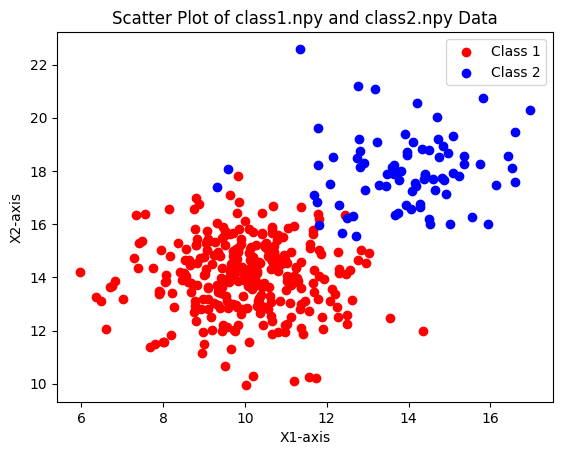

In [5]:
#plotting the data
x1 = class1_data[:, 0]
y1 = class1_data[:, 1]

x2 = class2_data[:, 0]
y2 = class2_data[:, 1]

# Plotting the scatter plots with different colors and labels
plt.scatter(x1, y1, color='red', label='Class 1')
plt.scatter(x2, y2, color='blue', label='Class 2')
plt.title('Scatter Plot of class1.npy and class2.npy Data')
plt.xlabel('X1-axis')
plt.ylabel('X2-axis')
plt.legend()
plt.show()

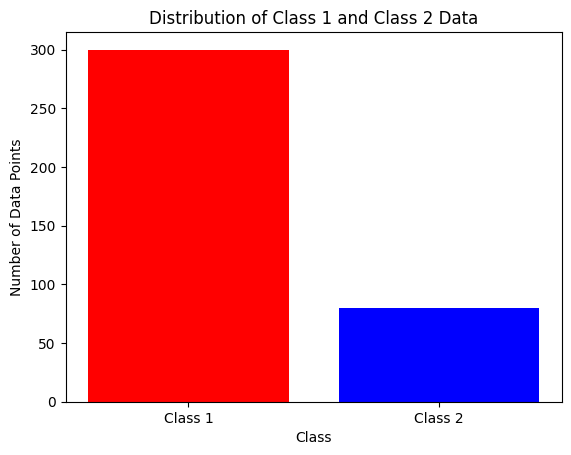

In [6]:
# Count the number of data points in each class
class1_count = class1_data.shape[0]
class2_count = class2_data.shape[0]

# Create a bar graph
plt.bar(['Class 1', 'Class 2'], [class1_count, class2_count], color=['red', 'blue'])
plt.title('Distribution of Class 1 and Class 2 Data')
plt.xlabel('Class')
plt.ylabel('Number of Data Points')
plt.show()

We can see that the dataset is imbalanced. Class 1 has 300 data points, while class 2 is having only 80 data points. This suggests that we may have to look for metrics other than accuracy to evaluate the model.

In [7]:
# Create labels
class1_labels = np.zeros((class1_data.shape[0], 1)) #assigninig 0 to class 1
class2_labels = np.ones((class2_data.shape[0], 1)) #assigning 1 to class 2

# Combine the data and labels
combined_class1 = np.hstack((class1_data, class1_labels))
combined_class2 = np.hstack((class2_data, class2_labels))

# Combine both classes into one array
combined_data = np.vstack((combined_class1, combined_class2))

# Create a DataFrame
df = pd.DataFrame(combined_data, columns=['x1', 'x2', 'y'])

# Save to CSV
df.to_csv('final_data.csv', index=False)

#### Splitting dataset into train and test and visualizing both train and test sets

X_train shape: (2, 304)
X_test shape: (2, 76)
y_train shape: (1, 304)
y_test shape: (1, 76)


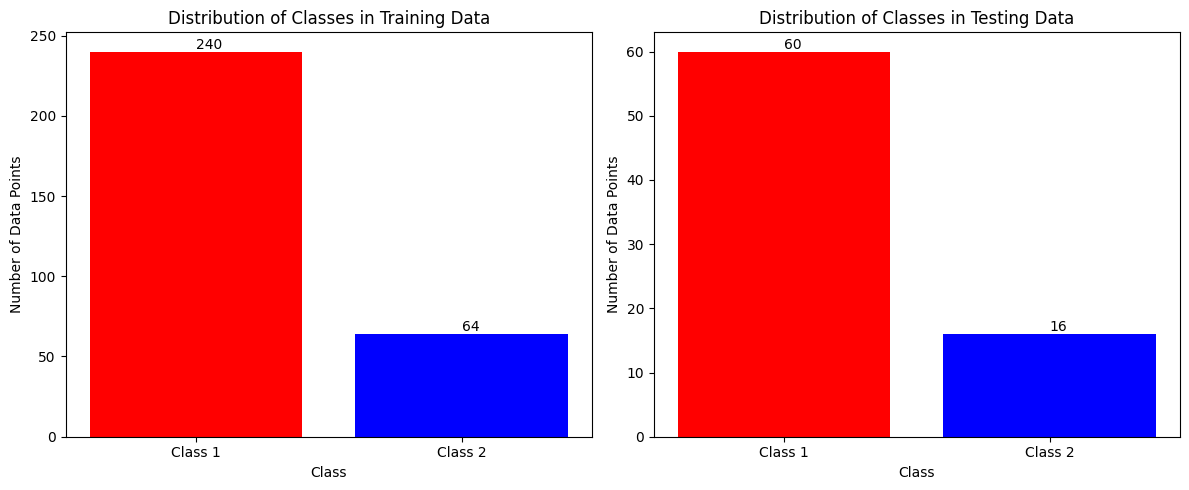

In [8]:
X = df[['x1', 'x2']].values.T
y = df['y'].values.reshape(1, -1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.T, y.T, test_size=0.2, random_state=42)

X_train = X_train.T
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T

# Print the shapes of the resulting datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


# Count the number of class 0 and class 1 data points in y_train
class0_train_count = np.sum(y_train == 0)
class1_train_count = np.sum(y_train == 1)

# Count the number of class 0 and class 1 data points in y_test
class0_test_count = np.sum(y_test == 0)
class1_test_count = np.sum(y_test == 1)

# Create a bar graph for the training data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
bars_train = plt.bar(['Class 1', 'Class 2'], [class0_train_count, class1_train_count], color=['red', 'blue'])
plt.title('Distribution of Classes in Training Data')
plt.xlabel('Class')
plt.ylabel('Number of Data Points')

# Add text annotations to the bars in the training data graph
for bar in bars_train:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')  # va: vertical alignment

# Create a bar graph for the testing data
plt.subplot(1, 2, 2)
bars_test = plt.bar(['Class 1', 'Class 2'], [class0_test_count, class1_test_count], color=['red', 'blue'])
plt.title('Distribution of Classes in Testing Data')
plt.xlabel('Class')
plt.ylabel('Number of Data Points')

# Add text annotations to the bars in the testing data graph
for bar in bars_test:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')  # va: vertical alignment

plt.tight_layout()
plt.show()


## Implementing Neural Network Building Blocks

In [9]:
def layer_sizes(X, Y, hidden_layer_neurons):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    
    n_x = X.shape[0]
    n_h = hidden_layer_neurons
    n_y = Y.shape[0]
    
    
    return (n_x, n_h, n_y)

In [10]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x) for Hidden layer
                    b1 -- bias vector of shape (n_h, 1) for Hidden layer
                    W2 -- weight matrix of shape (n_y, n_h) for the output layer
                    b2 -- bias vector of shape (n_y, 1) for the output layer
    """
    
    np.random.seed(2) #settnig a seed to reproduce results

    W1 = np.random.randn(n_h,n_x)*0.01 
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))
    
    #creating a dictionary of parameters to return
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [11]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]    

    Z1 = np.dot(W1,X)+b1
    A1 = relu(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = relu(Z2)
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [12]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    A2,cache = forward_propagation(X,parameters)
    predictions = (A2>0.5)
    return predictions

## Answer 1b. 

##### Creating neural network with 2 input features, 3 hidden neurons, 1 output neuron


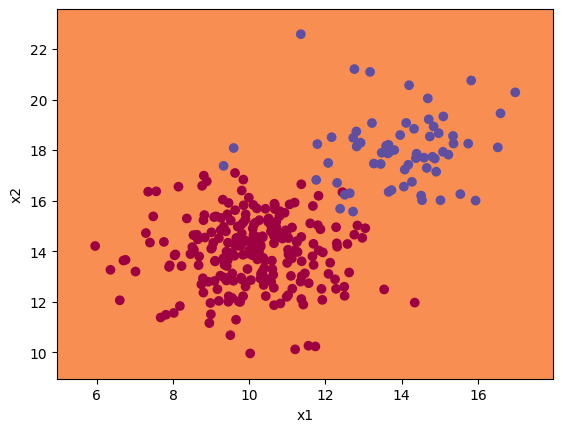

In [13]:
parameters = initialize_parameters(2, 3, 1)
A2,caches = forward_propagation(X_train, parameters)
predictions_noTraining = predict(parameters, X_test)

plot_decision_boundary(lambda x: predict(parameters, x.T), X_train, y_train[0, :])

### Observation:
The decision boundary plotted using the initial parameters without training does not effectively separate the two classes. The boundary appears to be almost linear and does not capture the underlying distribution of the data points. Most of the data points from both classes are not correctly classified, as indicated by the scattered points on both sides of the boundary.

### Implication:
This observation implies that the initial parameters are not sufficient to classify the data accurately. The model needs to be trained using gradient descent to adjust the parameters and learn a more complex decision boundary that can better separate the two classes. Training the model will help in minimizing the cost function and improving the classification accuracy, precision, and recall.

In [14]:

class1_train_count = np.sum(y_train == 0)
class2_train_count = np.sum(y_train == 1)

# Count the number of class 0 and class 1 data points in y_test
class1_test_count = np.sum(y_test == 0)
class2_test_count = np.sum(y_test == 1)


print("Percentage of total Class 1 data points : ", (class1_test_count+class1_train_count) / X.shape[1] * 100)
print("Percentage of total Class 2 data points : ", (class2_test_count+class2_train_count) / X.shape[1] * 100)
print("Class 1 percentage in training data : ", class1_train_count / X_train.shape[1] * 100)
print("Class 2 percentage in training data : ", class2_train_count / X_train.shape[1] * 100)
print("Class 1 percentage in testing data : ", class1_test_count / X_test.shape[1] * 100)
print("Class 2 percentage in testing data : ", class2_test_count / X_test.shape[1] * 100)
print("accuracy: ", accuracy_score(y_test[0, :], predictions_noTraining[0, :]))
print("precision: ", precision_score(y_test[0, :], predictions_noTraining[0, :]))
print("recall-score: ", recall_score(y_test[0, :], predictions_noTraining[0, :]))


Percentage of total Class 1 data points :  78.94736842105263
Percentage of total Class 2 data points :  21.052631578947366
Class 1 percentage in training data :  78.94736842105263
Class 2 percentage in training data :  21.052631578947366
Class 1 percentage in testing data :  78.94736842105263
Class 2 percentage in testing data :  21.052631578947366
accuracy:  0.7894736842105263
precision:  0
recall-score:  0.0


### Observation:
1. The accuracy of the model using the initial parameters without training is 0.78 which is equal to the percentage of class 1 data in test set. 
2. The precision of the model is also very low, indicating that the model is not correctly identifying positive instances(Class 2).
3. The recall score is zero, which means the model is failing to identify any of the positive instances(Class 2).

### Implication:
1. Model is bluntly classifying every data-point as class1. This shows that model has not learnt anything.
2. The model needs to be trained using gradient descent to adjust the parameters and improve its performance.
3. The current metrics suggest that the model is biased towards predicting the majority class (class 1), which is a common issue with imbalanced datasets. This further emphasizes the need for training and possibly using techniques to handle class imbalance.


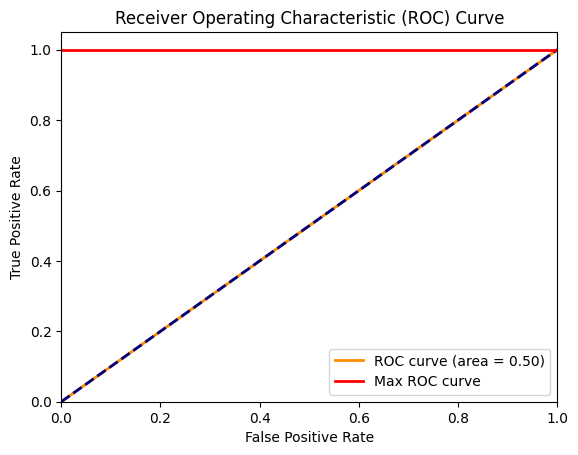

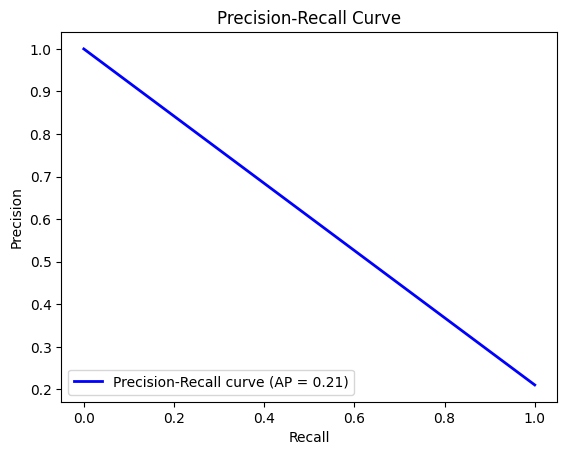

In [15]:
# Plot the ROC curve
plot_roc_curve(y_test[0, :], predictions_noTraining[0, :])

#plotting recall curve since dataset is imbalanced.
plot_precision_recall_curve(y_test[0, :], predictions_noTraining[0, :])

The ROC curve is a plot of the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The area under the ROC curve (AUC) is a measure of the model's ability to distinguish between classes. An AUC of 0.5 suggests no discrimination (i.e., random guessing), while an AUC of 1.0 indicates perfect discrimination.
### Observation:
1. In this case, the ROC curve is a diagonal line from (0,0) to (1,1), and the AUC is 0.5.
2. Since the dataset is imbalanced, it is important to look at precision-recall curve also. The diagonal curve indicates that the model's precision and recall are equal at every threshold.

### Implication:
1. The ROC curve and AUC value of 0.5 indicate that the model is not better than random guessing at distinguishing between the two classes.
2. This poor performance is expected since the model has not been trained yet, and the initial parameters are not optimized.
3. To improve the model's performance, it is necessary to train the model using gradient descent to adjust the parameters and learn a more effective decision boundary. After training, the ROC curve should ideally show a higher AUC, indicating better discrimination between the classes.

## Now implementing 1c

In [16]:
def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    """
    
    m = Y.shape[1] # number of example
    epsilon = 1e-8
    A2 = np.clip(A2, epsilon, 1 - epsilon)
    # Compute the cross-entropy cost
    cost = -1*(1/m)*np.sum(Y*np.log(A2)+(1-Y)*np.log(1-A2))
    cost = np.squeeze(cost) 
    
    return cost

In [17]:
def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    # Backward propagation: calculate dW1, db1, dW2, db2.
    dZ2 = A2-Y
    dW2 = (1/m)*np.dot(dZ2,A1.T)
    db2 = (1/m)*np.sum(dZ2, axis = 1, keepdims=True)
    g1_ = 1-np.power(A1,2)
    dZ1 = np.dot(W2.T,dZ2)*g1_
    dW1 = (1/m)*np.dot(dZ1,X.T)
    db1 = (1/m)*np.sum(dZ1, axis = 1, keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [18]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    dW2 = grads["dW2"]
    db1 = grads["db1"]
    db2 = grads["db2"]
    
    # Update rule for each parameter
    W1 = W1-learning_rate*dW1
    b1 = b1-learning_rate*db1
    W2 = W2-learning_rate*dW2
    b2 = b2-learning_rate*db2
    
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [19]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False, learning_rate=1.2):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y, n_h)[0]
    n_y = layer_sizes(X, Y, n_h)[2]

    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    # Loop (gradient descent)

    for i in range(0, num_iterations):
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2,Y,parameters)
        
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
        
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads, learning_rate)
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

Cost after iteration 0: 3.878038
Cost after iteration 1000: 0.469552
Cost after iteration 2000: 0.428673
Cost after iteration 3000: 0.380508
Cost after iteration 4000: 0.386996
Cost after iteration 5000: 0.359821
Cost after iteration 6000: 0.333932
Cost after iteration 7000: 0.308146
Cost after iteration 8000: 0.281886
Cost after iteration 9000: 0.255333


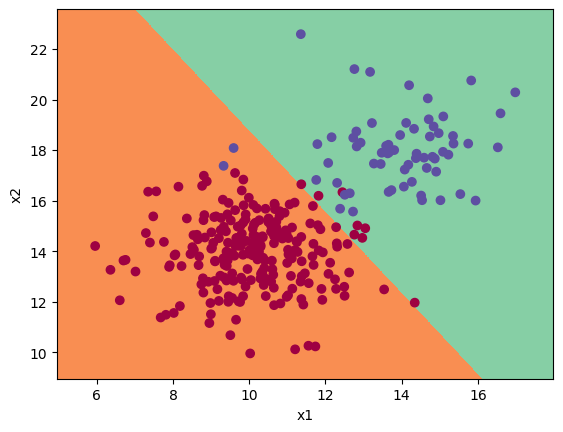

In [20]:
learning_rate = 0.01
parameters = nn_model(X_train, y_train, 3, num_iterations=10000, print_cost=True, learning_rate=learning_rate)
plot_decision_boundary(lambda x: predict(parameters, x.T), X_train, y_train[0, :])


In [21]:
predictions = predict(parameters, X_test)
print(accuracy_score(y_test[0, :], predictions[0, :]))
print(precision_score(y_test[0, :], predictions[0, :]))
print(recall_score(y_test[0, :], predictions[0, :]))

0.9868421052631579
0.9411764705882353
1.0


### Observation, comparision and implication on Decision-boundary
1. The decision boundary of the trained MLP model effectively separates the two classes, capturing the underlying distribution of the data points. The boundary is linear, adapting to the data's structure.
2. Their is not decision boundary of the initial MLP which shows it does not capture the underlying distribution of the data points. All data points are classified as belonging to class 1 only wich is the majority class. This shows that model is bluntly classifying every data-point as class 1 data-point only. It is not trained.

### Comparison on metrics:
1. **Accuracy**: The accuracy of the untrained model was 0.78, which is equal to the percentage of class 1 data in the test set. After training, the accuracy has significantly improved, indicating that the model has learned to classify the data more effectively.
2. **Precision**: The precision of the untrained model was zero suggesting that it was not identifying positive instances (Class 2). The trained model shows a significant higher precision of 0.94, meaning it is now better at distinguishing between the classes.
3. **Recall**: The recall score of the untrained model was zero, indicating that it failed to identify any positive instances. After training, the recall score has improved to 1, showing that the model is now capable of identifying all positive instances(class 2) correctly.

### Discussion:
1. The significant improvement in accuracy, precision, and recall scores after training indicates that the model has successfully learned from the training data and adjusted its parameters to better classify the data points.
2. The training process has minimized the cost function, leading to a more accurate and effective classification.
3. The improved metrics suggest that the chosen learning rate and number of iterations were appropriate for training the model effectively..


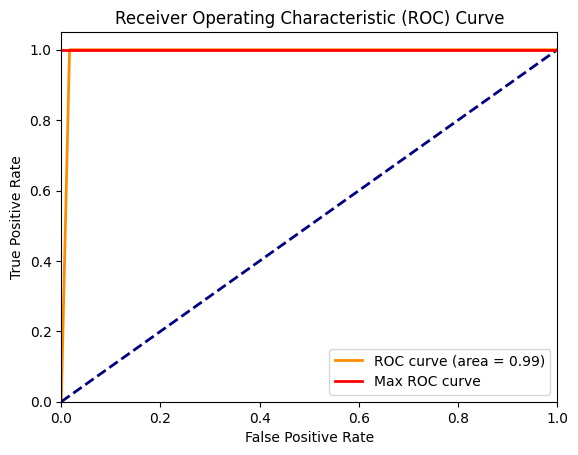

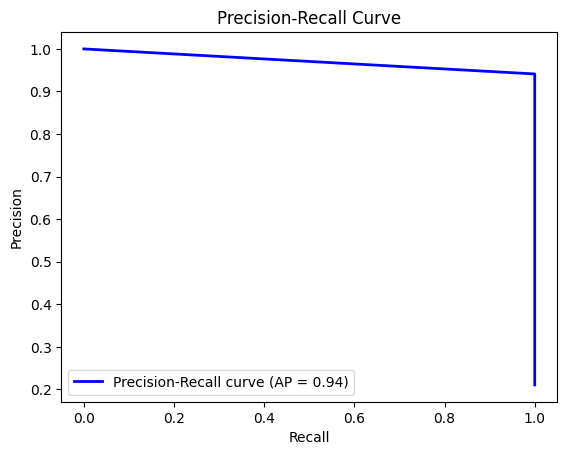

In [22]:
# Plot the ROC curve
plot_roc_curve(y_test[0, :], predictions[0, :])
# Plot the Precision-Recall curve for the predictions
plot_precision_recall_curve(y_test[0, :], predictions[0, :])

### Observation and comparison:
1. In this case, the ROC curve is well above the diagonal line from (0,0) to (1,1), and the AUC is near to perfect accuracy, close to 1.0. Red line(Max-AUC line is nerly overlapping with the model's AUC line) whereas the initial MLP's ROC line was overlapping with the blue-dashed line indicating that the initial MLP was doing random guessing.
2. The PR-curve for the trained model shows, high precision and high recall. This implies that the model is accurately doing positive predictions and also it classifies the most of the class1 instances correctly.

### Discussion:
1. The ROC curve and AUC value close to 1.0 indicate that the model is highly effective at distinguishing between the two classes.
2. This improved performance is expected since the model has been trained, and the parameters are optimized.
3. The high AUC value suggests that the model has learned to distinguish between the classes very effectively.

Even though the dataset is imbalanced, yet the trained MLP performs very well in classifying even no special care is given to the fact that the dataset is imbalanced.

# Part 2: Classification with RBF Network with Random RBF Centers.

<img src="IMG_3089.png" alt="A RBF network with 3 hidden neurons." width="600"/>

##### A RBF network with 3 hidden neurons with Gaussian function.

In [23]:


def get_rbf_centres(num_centers, X, mode='random'):
    """
    Returns the RBF centres for the data.
    
    Returns:
    rbf_centers (numpy.ndarray): The RBF centres.
    """
    np.random.seed(42)
    if mode == 'random':
        x_min, x_max = X[0, :].min(), X[0, :].max()
        y_min, y_max = X[1, :].min(), X[1, :].max()
        rbf_centers = np.random.uniform(
            low=np.array([x_min, y_min])[:, np.newaxis],  # Shape: (2, 1)
            high=np.array([x_max, y_max])[:, np.newaxis],
            size=(2, num_centers)
        ) #to get rbf_centres within data range only
        return rbf_centers
    elif mode == 'kmeans':
        kmeans = KMeans(n_clusters=num_centers, random_state=42).fit(X.T)
        return kmeans.cluster_centers_.T
    
def rbf_activation(X, centers, sigma):
    # X shape: (2, n_samples)
    #  centers shape: (2, n_centers)
    n_samples = X.shape[1]
    n_centers = centers.shape[1]
    H = np.zeros((n_samples, n_centers))
    
    for i in range(n_samples):
        # Compute squared Euclidean distance for sample i to all centers
        diff = X[:, i, np.newaxis] - centers  # Shape: (2, n_centers)
        dist_sq = np.sum(diff ** 2, axis=0)  # Shape: (n_centers,)
        H[i, :] = np.exp(-dist_sq / (2 * sigma ** 2))
    
    return H  # Shape: (n_samples, n_centers)


def computeLSEstimation(H,y):
    # H shape: (n_samples, n_centers)
    # y shape: (1, n_samples)
    H_T_H = np.dot(H.T,H)  # Compute H^T * H
    H_T_y = np.dot(H.T, y.T)  # Compute H^T * y

    # Compute (H^T * H)^(-1)
    H_T_H_inv = np.linalg.inv(H_T_H)

    # Compute final weight matrix W
    W = np.dot(H_T_H_inv, H_T_y)
    return W # Shape: (n_centers, 1)  



In [24]:
def plot_decision_boundary_withRBFcentres(W, X, y, rbf_centers, sigma, threshold=0.5):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    # Predict the function value for the whole grid
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    H_grid = rbf_activation(grid_points.T, rbf_centers, sigma)

    y_grid = (H_grid @ W >= threshold).astype(int)

    Z = y_grid.reshape(xx.shape)

    class_1 = X[:, y[0] == 0]  # Class 1 points (red)
    class_2 = X[:, y[0] == 1]  # Class 2 points (blue)
    # Plot the contour and training examples
    plt.figure(figsize=(8, 6))

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.Spectral)
    # plt.colorbar()

    # Plot the training points
    plt.scatter(class_1[0, :], class_1[1, :], c='red', edgecolors='k', marker='o', label='Class 1')
    plt.scatter(class_2[0, :], class_2[1, :], c='blue', edgecolors='k', marker='o', label='Class 2')

    # Highlight the RBF centers
    plt.scatter(rbf_centers[0,:], rbf_centers[1,:], color='green', s=100, marker='x', label=f'RBF Centers = {rbf_centers.shape[1]}')

    # Add labels and title
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Decision Boundary with RBF Centers')
    plt.legend(loc='best')

    # Show the plot
    plt.show()

In [25]:
def get_output(num_centers=3, sigma=1, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, mode='random', threshold=0.5):

    #threshold is very important hyper-paramter that will be adjusted to improve performance on the imbalanced dataset. By default, threshold is 0.5 for balanaced dataset.

    rbf_centers = get_rbf_centres(num_centers=num_centers, X=X_train, mode=mode)
    H_train = rbf_activation(X=X_train, centers=rbf_centers, sigma=sigma)
    W = computeLSEstimation(H=H_train, y=y_train)
    H_test = rbf_activation(X=X_test, centers=rbf_centers, sigma=sigma)
    y_pred_rbf = (H_test @ W >= threshold).astype(int).T
    accuracy = accuracy_score(y_test[0:], y_pred_rbf[0:])
    precision = precision_score(y_test[0:], y_pred_rbf[0:])
    recall = recall_score(y_test[0:], y_pred_rbf[0:])
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")

    plot_decision_boundary_withRBFcentres(W, X_train, y_train, rbf_centers, sigma, threshold)



### Answers to 2a and 2b.

Accuracy: 0.7763, Precision: 0.0000, Recall: 0.0000


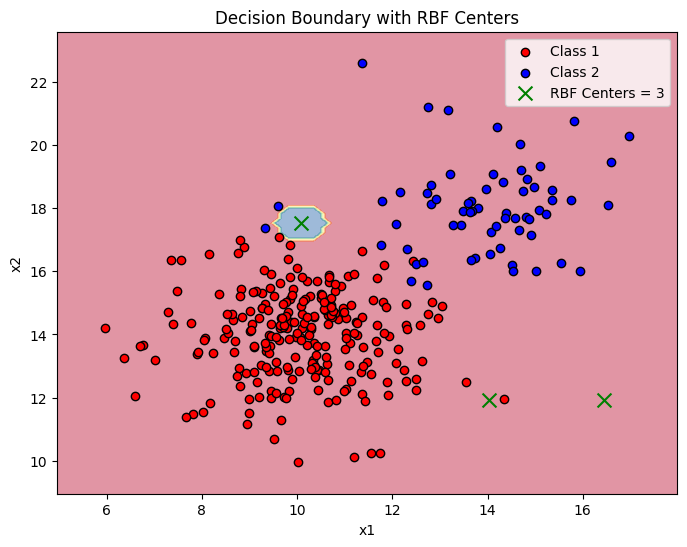

Accuracy: 0.9211, Precision: 1.0000, Recall: 0.6250


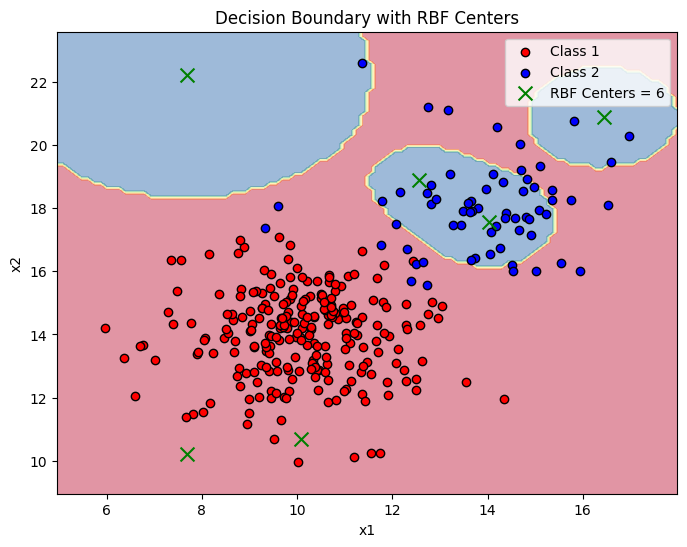

In [26]:
# num_centres = 3
# RBF centres are set "randomly"
# threshold = 0.5
get_output(num_centers=3, sigma=1, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test,mode='random', threshold=0.5)
get_output(num_centers=6, sigma=1, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test,mode='random', threshold=0.5)

## Comparison and discussion
With #rbf_centres=3, the RBF-model bahaves as a random classifier. The accuracy is 0.78 which is because of imbalanced dataset while precision and recall are zero which proves, that classifier is just randomly guessing. As compared to updated MLP, the precision, recall are nowhere close. And by seing decision-boundary, we can clearly say that there is no classification happening indeed in RBF-model.

*With #rbf_centres increased 6, we can see significant improvement in accuracy, precision and recall as compared to when #rbf_centres=3 case*. **This shows that increasing number of hidden neuron(= #rbf_centres) increases the classification performance**.

## Handling imbalanced dataset
##### *Note:- This is some extra hyperparameter tuning to increase performance.*
Now, in further series of experiments, **I will tune the threshold value, decreasing it step-by-step from 0.5**. Since, the dataset is imbalanced, performace is expected to improve.
I'll further change rbf_centre allocation mode from "random" to "k_means" to see its change in performace.

Accuracy: 0.7500, Precision: 0.0000, Recall: 0.0000


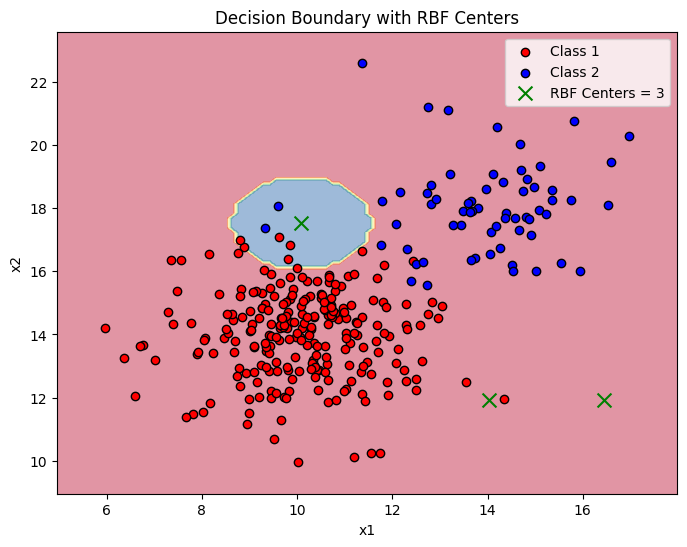

Accuracy: 0.9342, Precision: 1.0000, Recall: 0.6875


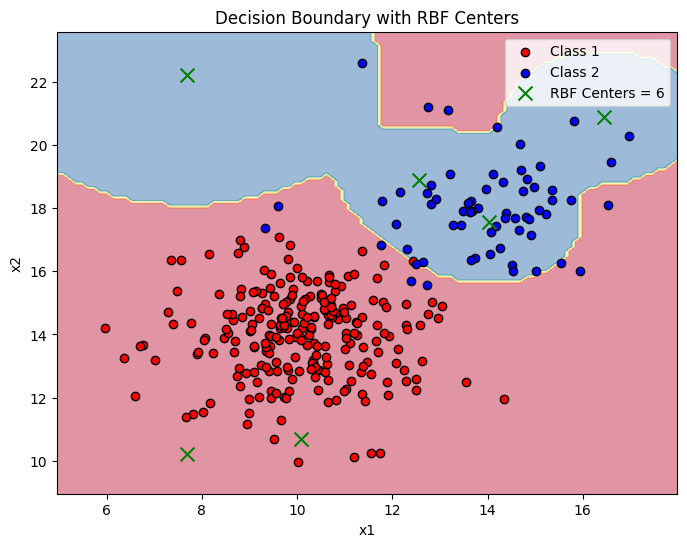

In [27]:
# RBF centres are set "randomly"
# threshold = 0.2
get_output(num_centers=3, sigma=1, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test,mode='random', threshold=0.2)
get_output(num_centers=6, sigma=1, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test,mode='random', threshold=0.2)

#### Decreasing threshold to 0.2,
#rbf_centres=3, no change 

#rbf_centres=6, slight increase in accuracy and recall


Accuracy: 0.7500, Precision: 0.2000, Recall: 0.0625


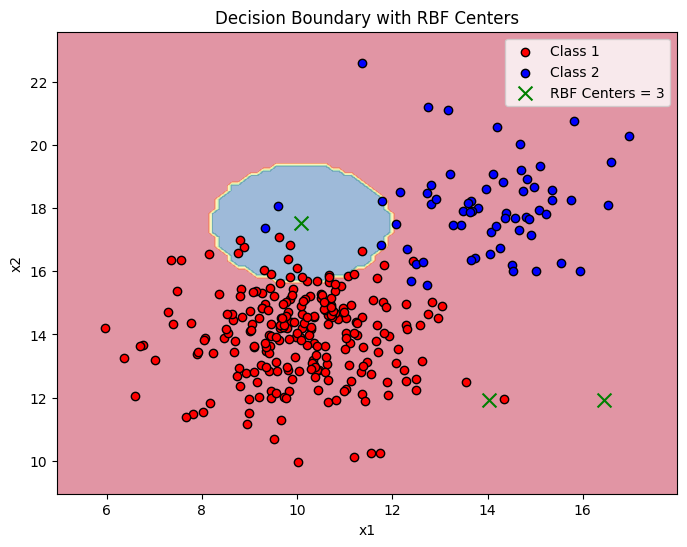

Accuracy: 0.9737, Precision: 1.0000, Recall: 0.8750


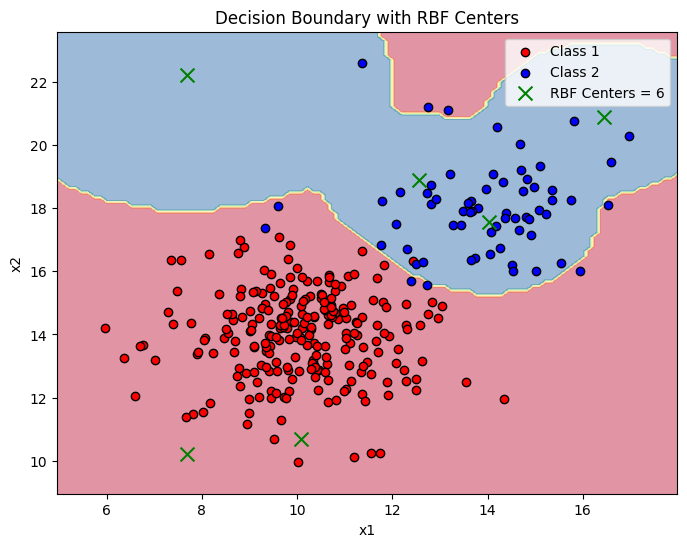

In [28]:
# RBF centres are set "randomly"
# threshold = 0.2
get_output(num_centers=3, sigma=1, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test,mode='random', threshold=0.1)
get_output(num_centers=6, sigma=1, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test,mode='random', threshold=0.1)

#### Decreasing threshold to 0.1,
#rbf_centres=3, slight improvement in precision and recall.

#rbf_centres=6, significant increase in accuracy and recall


##### Changing selection of rbf_centres from random to k_means.

Accuracy: 0.8816, Precision: 1.0000, Recall: 0.4375


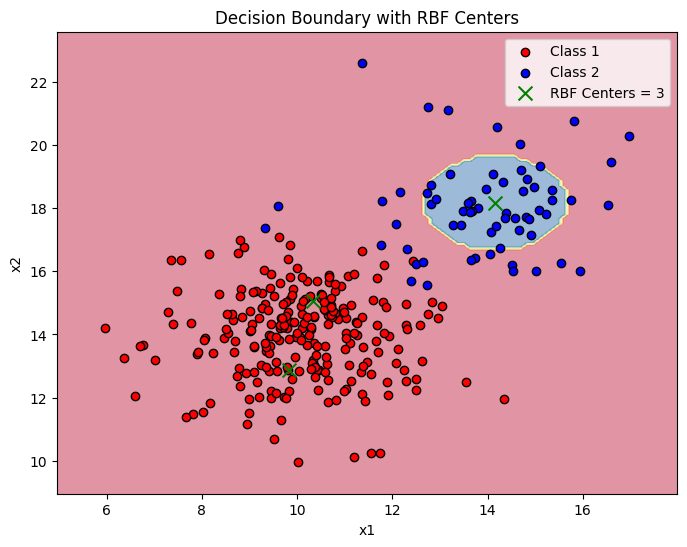

Accuracy: 0.8684, Precision: 1.0000, Recall: 0.3750


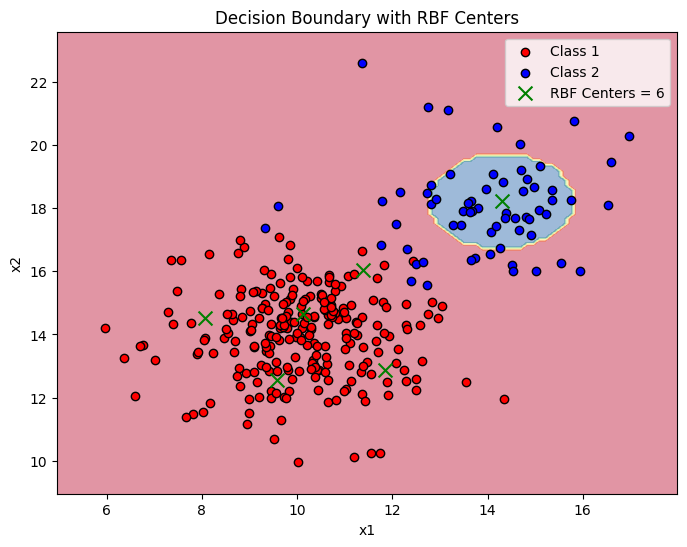

In [29]:
# RBF centres are set "kmeans" to incerease performance
# threshold = 0.5
get_output(num_centers=3, sigma=1, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test,mode='kmeans', threshold=0.5)
get_output(num_centers=6, sigma=1, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test,mode='kmeans', threshold=0.5)

####
#rbf_centres=3, significant increase in accuracy and recall as compared to when mode was "random"

#rbf_centres=6, slight decrease in accuracy and recall as compared to when mode was "random"


Accuracy: 0.9211, Precision: 1.0000, Recall: 0.6250


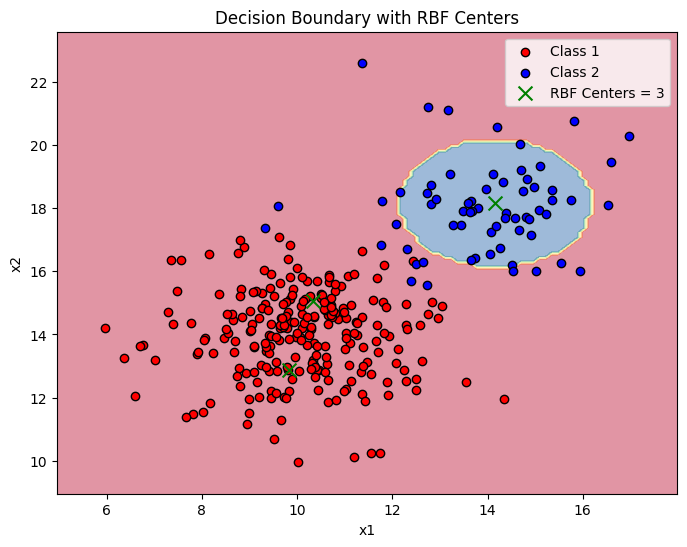

Accuracy: 0.9079, Precision: 0.7647, Recall: 0.8125


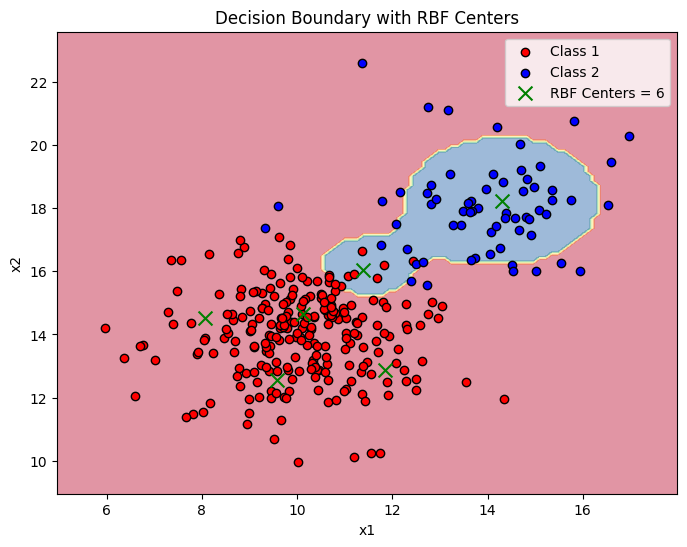

In [30]:
# threshold = 0.2
get_output(num_centers=3, sigma=1, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test,mode='kmeans', threshold=0.2)
get_output(num_centers=6, sigma=1, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test,mode='kmeans', threshold=0.2)

#### Decreasing threshold to 0.2, mode="kmeans",
#rbf_centres=3, significant improvement in all 3 metrices.

#rbf_centres=6, accuracy goes down a bit, recall increases signicantly, precision also decreases a bit.


Accuracy: 0.9474, Precision: 1.0000, Recall: 0.7500


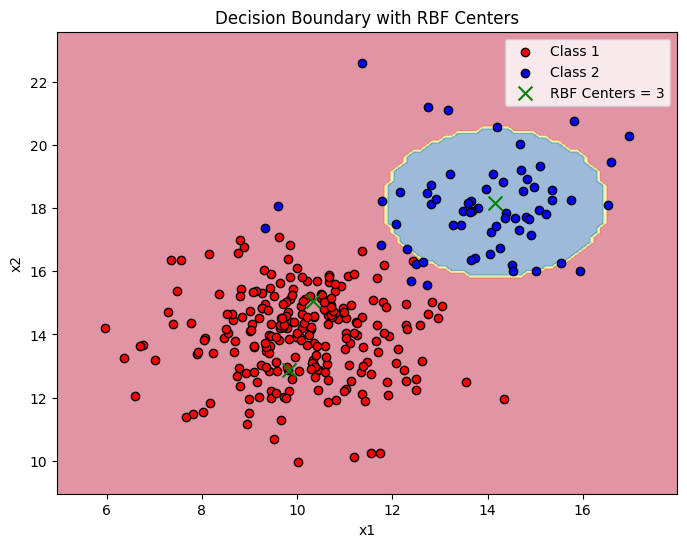

Accuracy: 0.8947, Precision: 0.7000, Recall: 0.8750


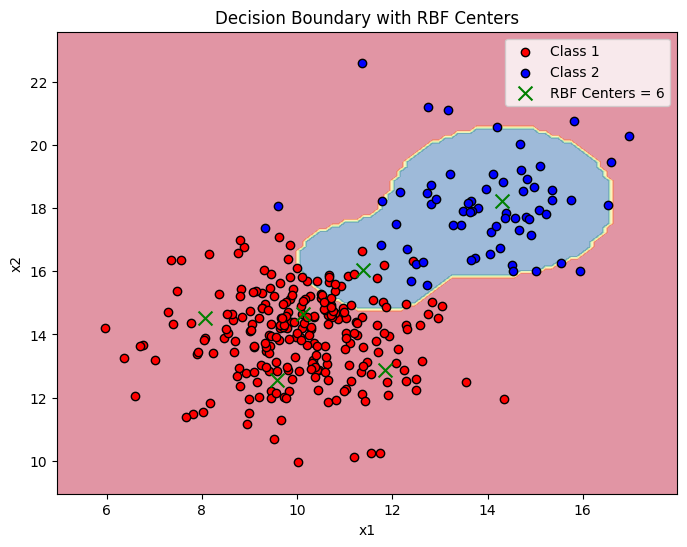

In [31]:
# threshold = 0.1
get_output(num_centers=3, sigma=1, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test,mode='kmeans', threshold=0.1)
get_output(num_centers=6, sigma=1, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test,mode='kmeans', threshold=0.1)

Accuracy: 0.9605, Precision: 1.0000, Recall: 0.8125


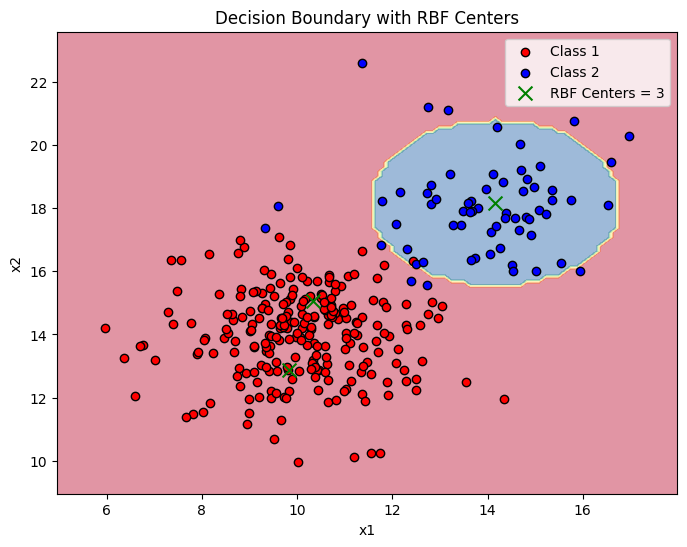

Accuracy: 0.8947, Precision: 0.6818, Recall: 0.9375


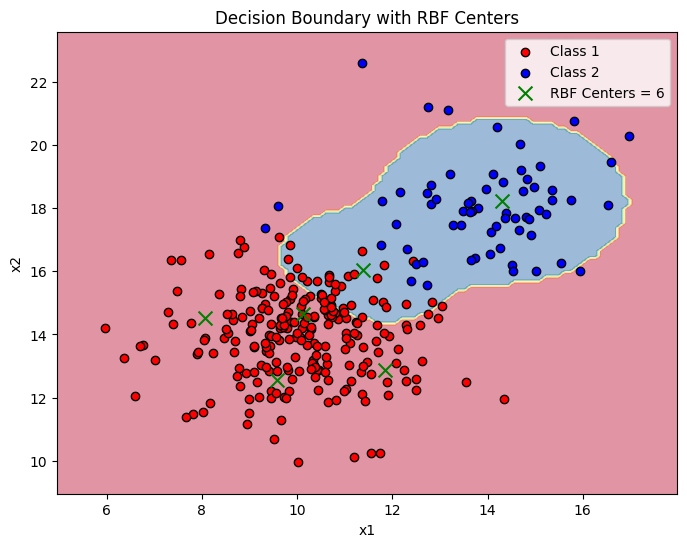

In [32]:
# threshold = 0.05
get_output(num_centers=3, sigma=1, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test,mode='kmeans', threshold=0.05)
get_output(num_centers=6, sigma=1, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test,mode='kmeans', threshold=0.05)

Accuracy: 0.9868, Precision: 0.9412, Recall: 1.0000


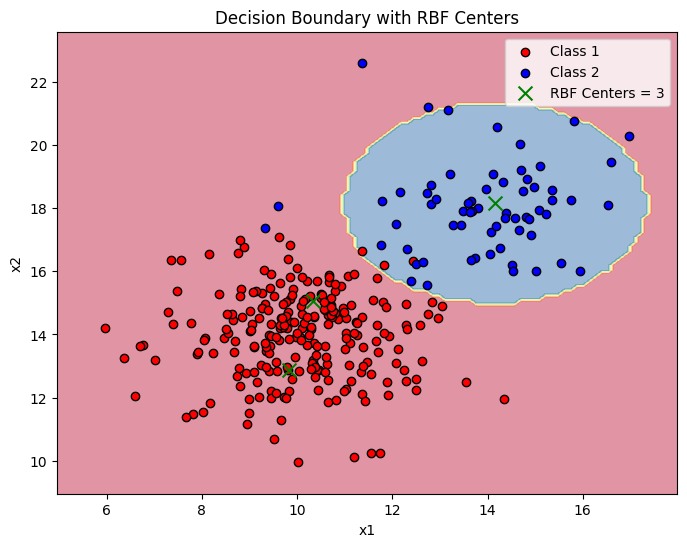

Accuracy: 0.6316, Precision: 0.3636, Recall: 1.0000


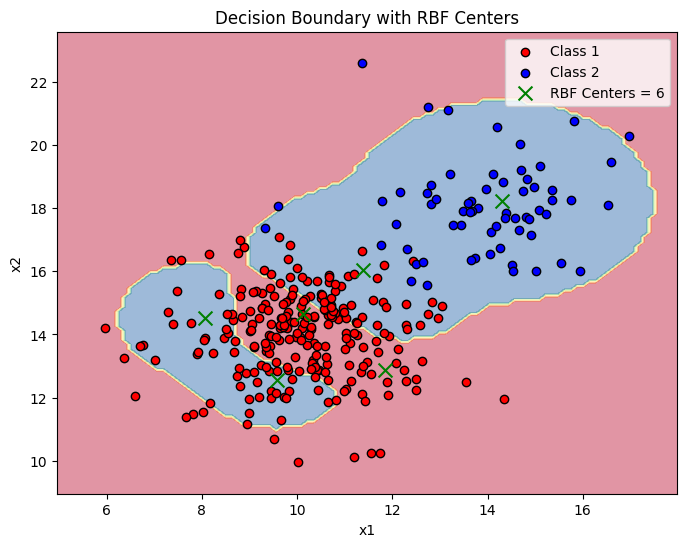

In [33]:
# threshold = 0.01
get_output(num_centers=3, sigma=1, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test,mode='kmeans', threshold=0.01)
get_output(num_centers=6, sigma=1, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test,mode='kmeans', threshold=0.01)

##### At this configuration, mode="kmeans", threshold=0.01, mRBF-model performs extremely well with #centres=3, but with #centres=6, its performance detriorates badly.
##### With #centres=3, We can see with decreasing threshold, model's classification performance is increasing and decision boundary is also becoming sharp and accurate.